# ESG and EV Analytics Project
This project combines ESG data with analytics in the electric vehicle (EV) automotive sector, focusing on technological aspects of vehicle performance and environmental impact.

## Objectives
- Evaluate KPIs such as battery health, energy consumption, regenerative braking efficiency, and range optimization.
- Incorporate ESG indicators like carbon emissions reduction, sustainable material usage, energy sources for charging, and waste management practices.
- Demonstrate the application of data science and machine learning techniques in supporting R&D and sustainability goals.

In [2]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

## Load and Explore Data

In [3]:
# Load EV performance and ESG data
ev_data = pd.read_csv(r"G:\DIYguru\Data-Science-and-Engineering-Analytics\Projects\Main_Project_Data_Analysis\ev_performance_data.csv")
esg_data = pd.read_csv(r"G:\DIYguru\Data-Science-and-Engineering-Analytics\Projects\Main_Project_Data_Analysis\esg_indicators.csv")

# Display basic information
print(ev_data.info())
print(esg_data.info())

# Preview the datasets
print(ev_data.head())
print(esg_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   vehicle_id                       5 non-null      int64  
 1   distance_traveled                5 non-null      int64  
 2   energy_consumed                  5 non-null      int64  
 3   baseline_emissions               5 non-null      int64  
 4   actual_emissions                 5 non-null      int64  
 5   regenerative_braking_efficiency  5 non-null      float64
 6   range_optimization               5 non-null      float64
dtypes: float64(2), int64(5)
memory usage: 408.0 bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   vehicle_id                  5 non-null      int64  
 1   carbon

## Data Cleaning and Preprocessing

In [4]:
# Handle missing values
ev_data.fillna(method='ffill', inplace=True)
esg_data.fillna(method='bfill', inplace=True)

# Merge datasets on a common key (e.g., vehicle_id)
combined_data = pd.merge(ev_data, esg_data, on='vehicle_id')
print(combined_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   vehicle_id                       5 non-null      int64  
 1   distance_traveled                5 non-null      int64  
 2   energy_consumed                  5 non-null      int64  
 3   baseline_emissions               5 non-null      int64  
 4   actual_emissions                 5 non-null      int64  
 5   regenerative_braking_efficiency  5 non-null      float64
 6   range_optimization               5 non-null      float64
 7   carbon_reduction                 5 non-null      int64  
 8   sustainable_material_usage       5 non-null      float64
 9   energy_source                    5 non-null      object 
 10  waste_management_practices       5 non-null      object 
dtypes: float64(3), int64(6), object(2)
memory usage: 568.0+ bytes
None


C:\Users\DELL\AppData\Local\Temp\ipykernel_16036\3157696313.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ev_data.fillna(method='ffill', inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_16036\3157696313.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  esg_data.fillna(method='bfill', inplace=True)


## Feature Engineering

In [5]:
# Create new features
combined_data['battery_efficiency'] = combined_data['energy_consumed'] / combined_data['distance_traveled']
combined_data['carbon_reduction'] = combined_data['baseline_emissions'] - combined_data['actual_emissions']

# Normalize numeric features
numeric_cols = ['battery_efficiency', 'carbon_reduction', 'regenerative_braking_efficiency']
combined_data[numeric_cols] = (combined_data[numeric_cols] - combined_data[numeric_cols].mean()) / combined_data[numeric_cols].std()
print(combined_data.head())

   vehicle_id  distance_traveled  energy_consumed  baseline_emissions  \
0           1                120               15                 200   
1           2                100               12                 180   
2           3                150               18                 220   
3           4                130               14                 210   
4           5                110               13                 190   

   actual_emissions  regenerative_braking_efficiency  range_optimization  \
0               150                         0.000000                0.90   
1               140                        -1.212678                0.85   
2               160                         1.212678                0.92   
3               155                         0.727607                0.89   
4               145                        -0.727607                0.87   

   carbon_reduction  sustainable_material_usage energy_source  \
0          0.000000                    

## Machine Learning Model

In [6]:
# Split data into training and testing sets
X = combined_data[['battery_efficiency', 'carbon_reduction', 'regenerative_braking_efficiency']]
y = combined_data['range_optimization']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

Mean Squared Error: 0.001237680000000032
R2 Score: -0.42809230769234197


## ESG Analytics and Insights

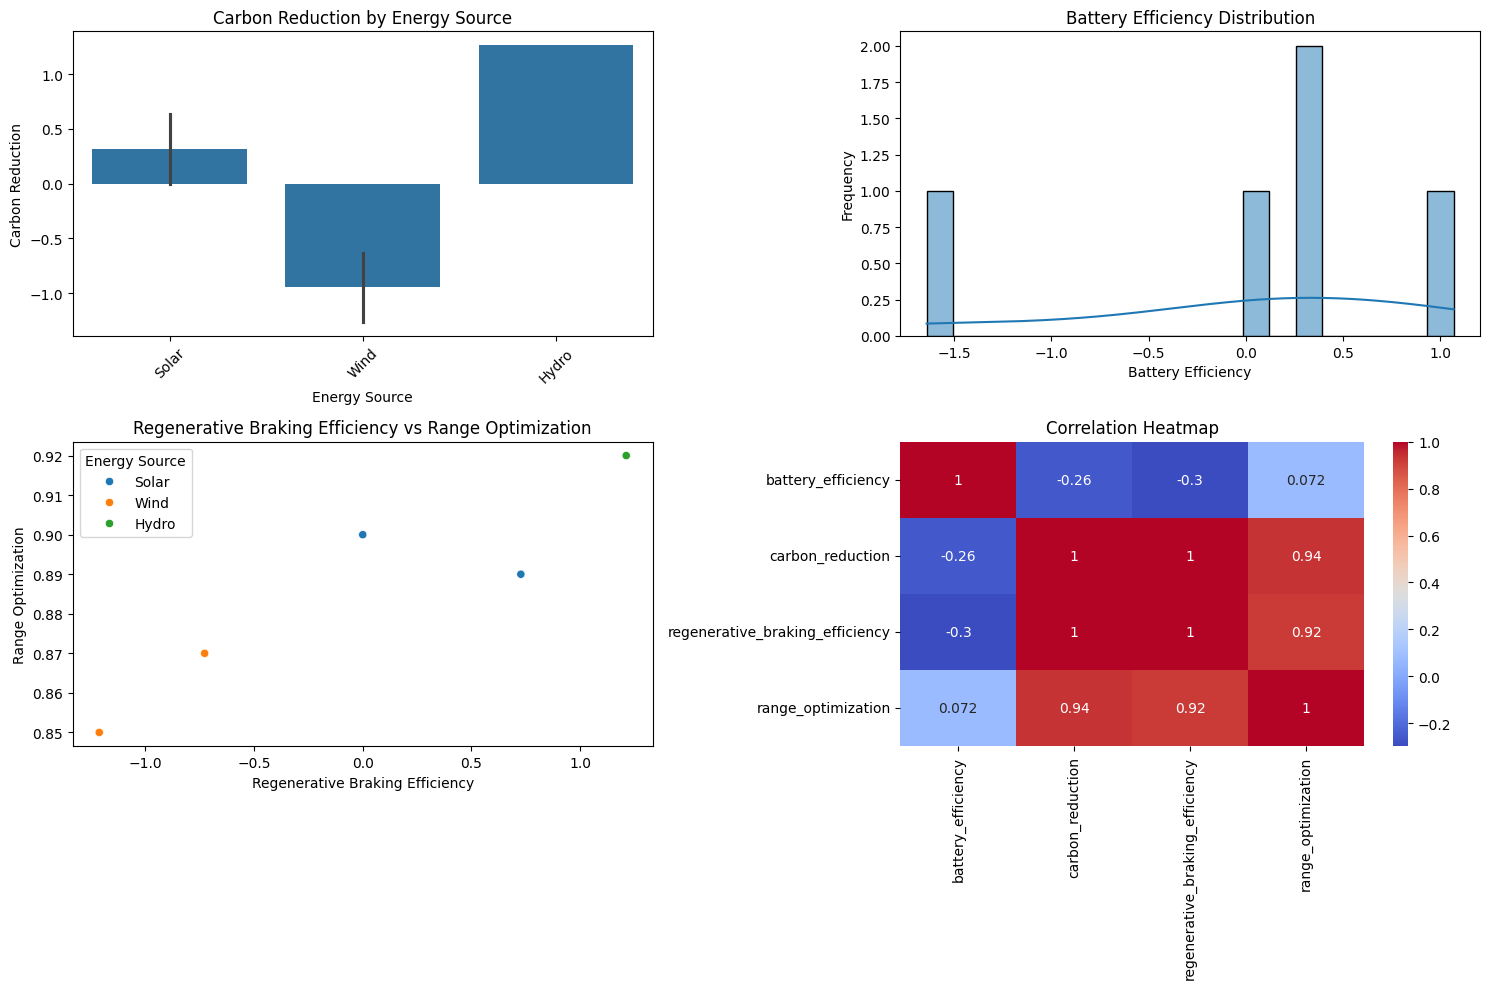

In [7]:
# Advanced ESG Analytics and Insights Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots for advanced visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Subplot 1: Carbon reduction by energy source
sns.barplot(x='energy_source', y='carbon_reduction', data=combined_data, ax=axes[0, 0])
axes[0, 0].set_title('Carbon Reduction by Energy Source')
axes[0, 0].set_xlabel('Energy Source')
axes[0, 0].set_ylabel('Carbon Reduction')
axes[0, 0].tick_params(axis='x', rotation=45)

# Subplot 2: Battery efficiency distribution
sns.histplot(combined_data['battery_efficiency'], kde=True, bins=20, ax=axes[0, 1])
axes[0, 1].set_title('Battery Efficiency Distribution')
axes[0, 1].set_xlabel('Battery Efficiency')
axes[0, 1].set_ylabel('Frequency')

# Subplot 3: Regenerative braking efficiency vs range optimization
sns.scatterplot(x='regenerative_braking_efficiency', y='range_optimization', data=combined_data, hue='energy_source', ax=axes[1, 0])
axes[1, 0].set_title('Regenerative Braking Efficiency vs Range Optimization')
axes[1, 0].set_xlabel('Regenerative Braking Efficiency')
axes[1, 0].set_ylabel('Range Optimization')
axes[1, 0].legend(title='Energy Source')

# Subplot 4: Correlation heatmap
correlation_matrix = combined_data[['battery_efficiency', 'carbon_reduction', 'regenerative_braking_efficiency', 'range_optimization']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', ax=axes[1, 1])
axes[1, 1].set_title('Correlation Heatmap')

# Adjust layout
plt.tight_layout()
plt.show()